In the following assignment we have worked upon seaborn llibrary, pandas, numpy and matplotlib where we have found mean, varience, correlation coeffient of the dataset of the **'iris'** dataset given to us.

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = sns.load_dataset(name='iris')   #the dataset is loaded using seaborn library under name data

In [ ]:
data.head()   #showing first5 rows of the dataset using head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
sepal_length=np.array(data.sepal_length)    #here I am converting the value of the whole column in the dataset into the numpy array using np.array() and by calling the column.
sepal_width=np.array(data.sepal_width)
petal_length=np.array(data.petal_length)
petal_width=np.array(data.petal_width)

# Question 1:

Estimate the mean and the variance of the four attributes.

In order to estimate the mean of the dataset forlmula for mean is as follows:

Mean, $\overline{x}= \frac{1}{n} \sum_{i=i}^{n} x_{i} $

In order to estimate the Variance of the dataset forlmula for Variance is as follows:

Variance,$\sigma^2 = \frac{\sum_{i=1}^{n}(x_i - \overline{x})^2} {n-1}$

$x_i$ are the datapoint in the dataset.

In [ ]:
def mean_ary(ary):
  ary=pd.to_numeric(ary)      #here we are converting the values from pandas series to numeric values
  mean=0
  for i in range(len(ary)):
    mean+=ary[i]              #here we are taking the sum of all the values in dataset
  mean/=len(ary)
  return mean

def var(ary):
  ary=pd.to_numeric(ary)
  mean=mean_ary(ary)          #here we are taking out the mean of the dataset using the mean function defined above
  varience=0
  for i in range(len(ary)):
    varience+=(ary[i]-mean)**2  #here we are applying the syntax for the formula of variance derived above
  varience/=(len(ary)-1)
  return varience

print('Mean of sepal_lenght:',mean_ary(sepal_length))
print()
print('Mean of sepal_width:',mean_ary(sepal_width))
print()
print('Mean of petal_lenght:',mean_ary(petal_length))
print()
print('Mean of petal_width:',mean_ary(petal_width))
print()
print('Varience of sepal_lenght:',var(sepal_length))
print()
print('Varience of sepal_width:',var(sepal_width))
print()
print('Varience of petal_lenght:',var(petal_length))
print()
print('Varience of petal_width:',var(petal_width))

Mean of sepal_lenght: 5.843333333333335

Mean of sepal_width: 3.057333333333334

Mean of petal_lenght: 3.7580000000000027

Mean of petal_width: 1.199333333333334

Varience of sepal_lenght: 0.6856935123042505

Varience of sepal_width: 0.1899794183445188

Varience of petal_lenght: 3.1162778523489942

Varience of petal_width: 0.5810062639821029


#Question 2:

Arrange the pairs of attributes in the descending order of their correlation coefficients.

Correlation is a statistical measure that expresses the extent to which two variables are linearly related.

We mesure the value of correlation coefficient in order to define how linear the relationship is between two datasets.

Correlation coefficient, $r = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2  \sum_{i=1}^{n}(y_i - \overline{y})^2}}$  (Pearson Correlation Coefficient)

the value of $r$ lies between -1 to 1 and morrre the value is towards 0 less are the two variables linearly related.

Covariance=$\sum_{i=1}^{n} (x_i-\overline{x})(y_i-\overline{y})/n$


In [ ]:
def correlation(ary1,ary2):
  mean1=mean_ary(ary1)
  mean2=mean_ary(ary2)
  varience1=var(ary1)*(len(ary1)-1)
  varience2=var(ary2)*(len(ary2)-1)
  nume=0
  for i in range(len(ary1)):
    nume+=(ary1[i]-mean1)*(ary2[i]-mean2)    #here I am applying the syntax of the formula of correlation coefficient whoes formula is mentioned above
  denom=(varience1*varience2)**0.5
  correlation=nume/denom
  return correlation

def find_min_correlation(data):
  points=data.columns.tolist()    #here we are creating the list of all the column names of the dataset in data
  min_dict={}
  correlation_coefficient=[]
  for i in range(len(points)-1):
    for j in range(i+1,len(points)-1):
      arry1=data[points[i]].to_numpy()   #here we are converting the column of the dataset into numpy array
      arry2=data[points[j]].to_numpy()
      r=correlation(arry1,arry2)         #finding correlation coefficient
      correlation_coefficient.append(r)
      min_dict[(points[i],points[j])]=r  #appending it into dictionary with names of both the dataset
  sort_min_dict = dict(sorted(min_dict.items(), key=lambda x: x[1],reverse=True))   #here i have sorted the dictionary in decending order of correlation coefficient values using lambda function

  ans_list=[]
  for i in sort_min_dict.keys():
    ans_list.append(i)                   #here i am appending the pair of dataset in the descending order of there correlation coefficient
  return ans_list

def list_correlation(data):
  points=data.columns.tolist()
  correlation_coefficient=[]
  for i in range(len(points)-1):
    for j in range(i+1,len(points)-1):
      arry1=data[points[i]].to_numpy()
      arry2=data[points[j]].to_numpy()
      r=correlation(arry1,arry2)
      correlation_coefficient.append(r)
  sort_correlation_coefficient=sorted(correlation_coefficient,reverse=True)     #here i have sorted the values of all the correlation coeeficeint of the dataset in descending order

  return sort_correlation_coefficient

print('Descending order of pairs of attributes:',end=' ')
print(find_min_correlation(data))
print()
print('Descending order of correlation coefficient pairs of attributes:')
print(list_correlation(data))

Descending order of pairs of attributes: 

NameError: name 'data' is not defined

Plotting the scatter plot of the pair of dataset to visualize the distribution and the correlation.

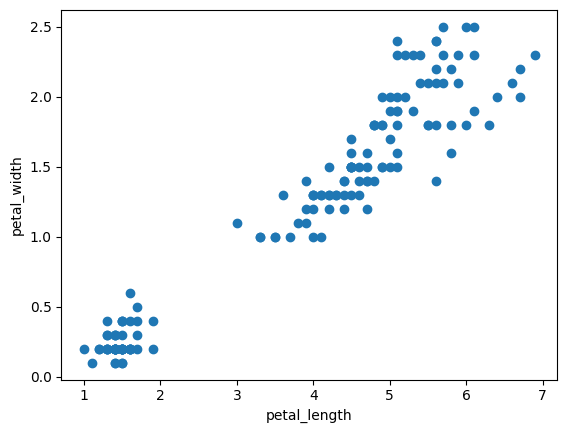

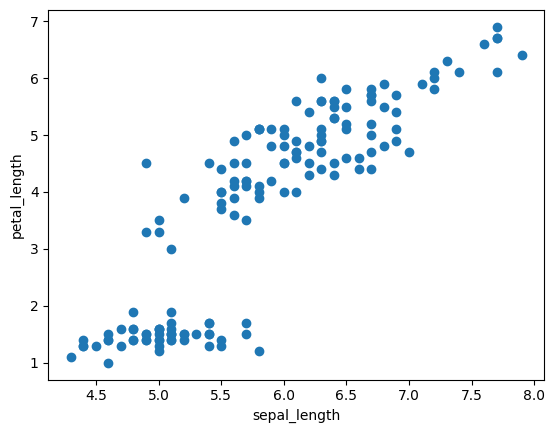

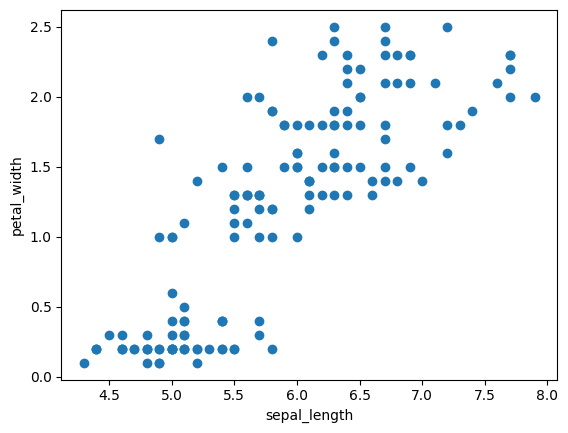

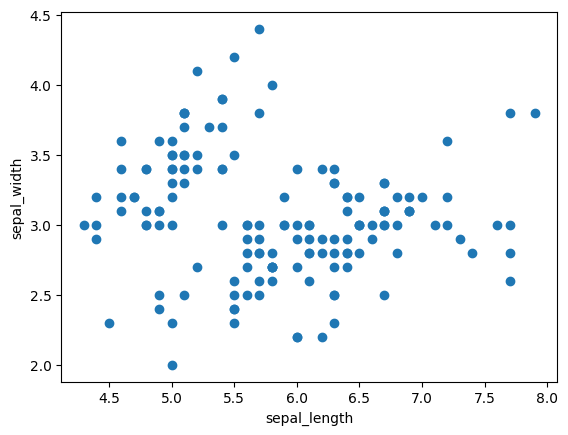

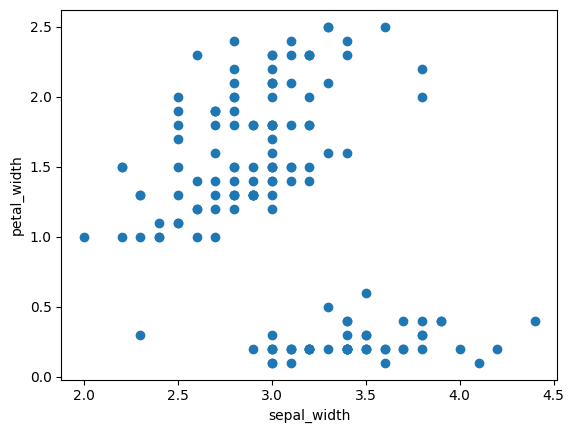

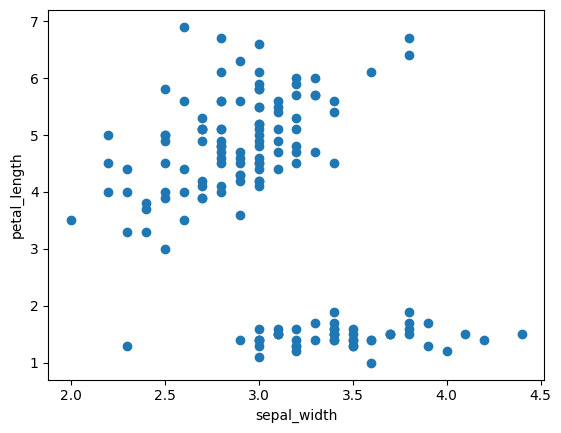

In [ ]:
def plot_columns(data):
  list_names=find_min_correlation(data)
  for i in range(len(list_names)):
    arry11=data[list_names[i][0]].to_numpy()
    arry22=data[list_names[i][1]].to_numpy()
    plt.scatter(arry11,arry22)
    plt.xlabel(f'{list_names[i][0]}')
    plt.ylabel(f'{list_names[i][1]}')
    plt.show()

plot_columns(data)

# Question 3

Repeat the Question 2 above for the 3 different species separately and report the same.

In [ ]:
species_point=data['species'].unique()     #here i am finding the unique names of the species using .unique() on the species column
species_point_list=list(species_point)
print(species_point_list)

['setosa', 'versicolor', 'virginica']


In [ ]:
def min_correlation_sortedspecies():
  for i in range(len(species_point)):
    datai=data[data['species']==species_point_list[i]]
    print(f'Descending order of pairs of attributes specie({species_point_list[i]}):',end=' ')
    print(find_min_correlation(datai))        #finding the list of the descending order of all the correlation values of the particular species according to the correlation coefficient value
    print()
    print(f'Descending order of correlation coefficient pairs of attributes specie({species_point_list[i]}):')
    print(list_correlation(datai))            #finding the list of descending order of all the correlation coefficient values
    print()
min_correlation_sortedspecies()

Descending order of pairs of attributes specie(setosa): [('sepal_length', 'sepal_width'), ('petal_length', 'petal_width'), ('sepal_length', 'petal_width'), ('sepal_length', 'petal_length'), ('sepal_width', 'petal_width'), ('sepal_width', 'petal_length')]

Descending order of correlation coefficient pairs of attributes specie(setosa):
[0.7425466856651597, 0.3316300408041185, 0.27809835293596946, 0.26717575886875716, 0.2327520113628794, 0.17769996678227068]

Descending order of pairs of attributes specie(versicolor): [('petal_length', 'petal_width'), ('sepal_length', 'petal_length'), ('sepal_width', 'petal_width'), ('sepal_width', 'petal_length'), ('sepal_length', 'petal_width'), ('sepal_length', 'sepal_width')]

Descending order of correlation coefficient pairs of attributes specie(versicolor):
[0.7866680885228168, 0.7540489585920161, 0.6639987200241115, 0.5605220916929818, 0.5464610715986299, 0.5259107172828243]

Descending order of pairs of attributes specie(virginica): [('sepal_lengt

Plotting all the dataset from all the Species usinfg scatter plotting in matplotlib.

Plots for species setosa:


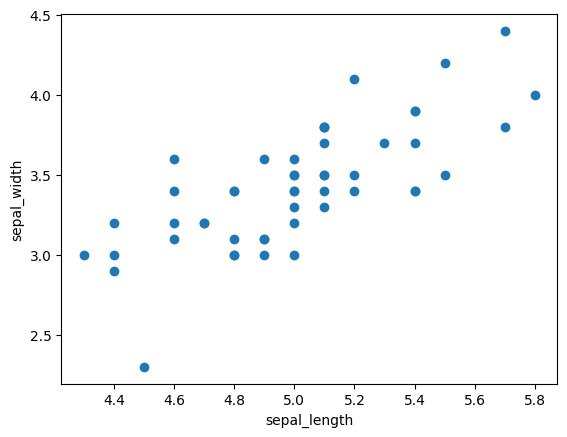

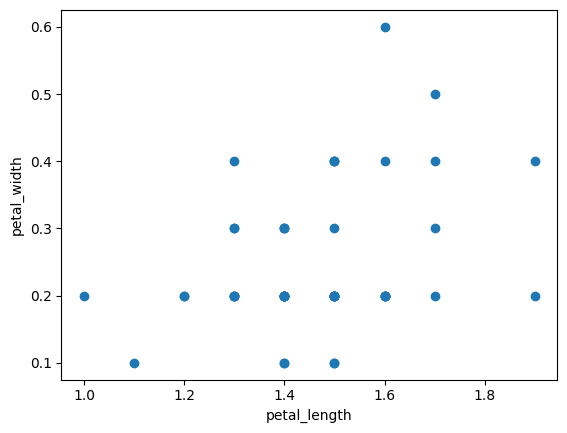

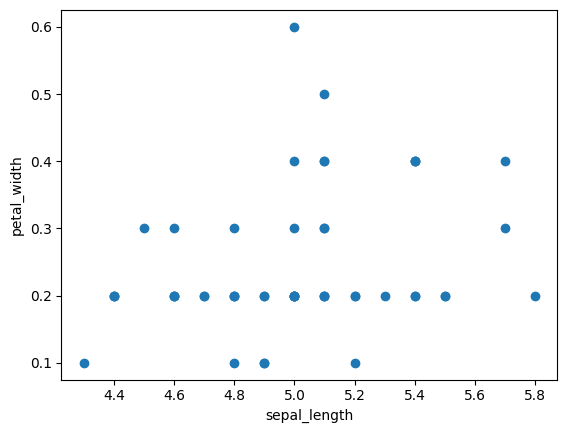

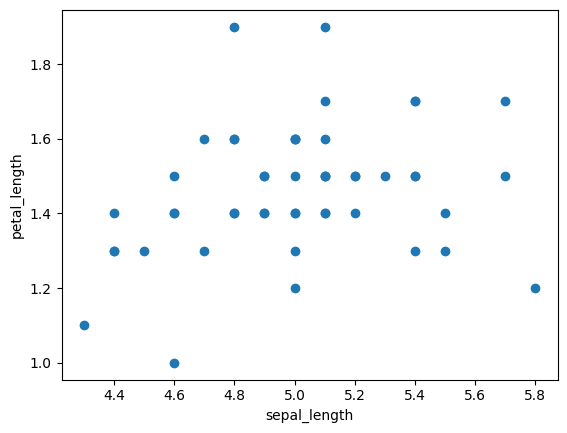

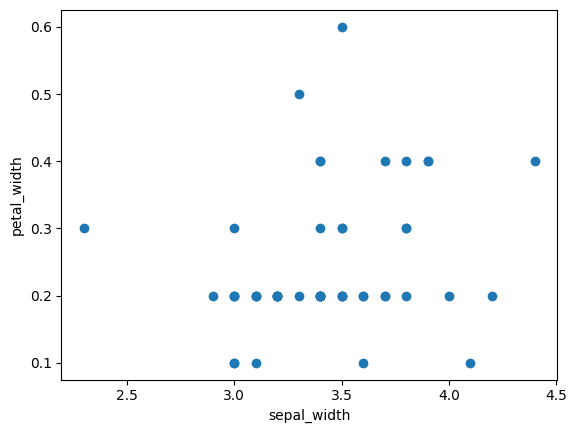

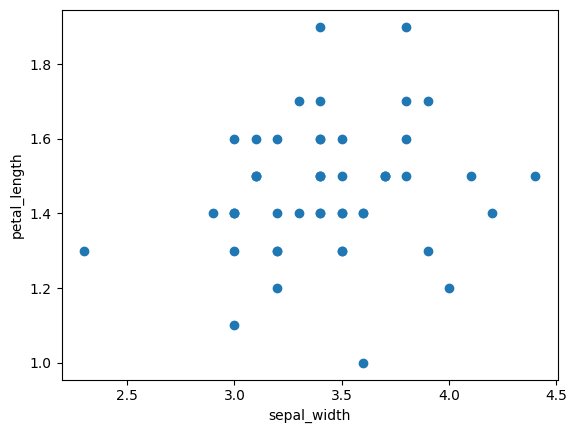

Plots for species versicolor:


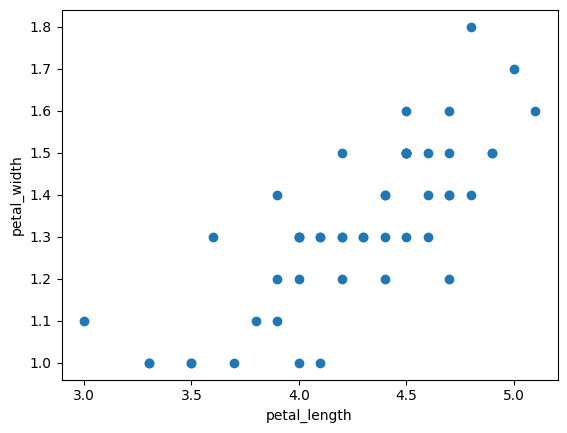

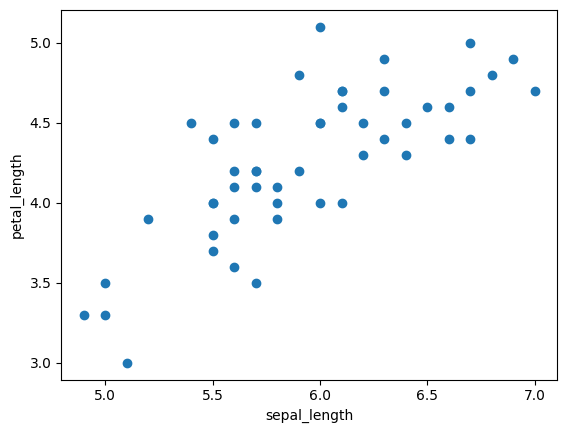

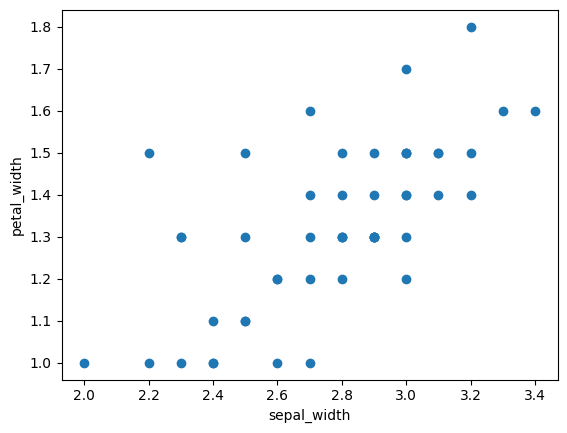

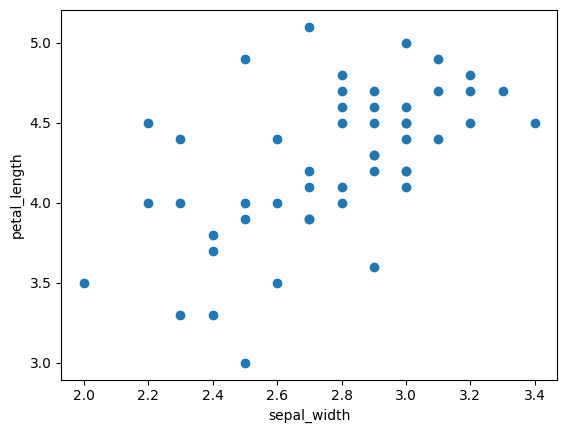

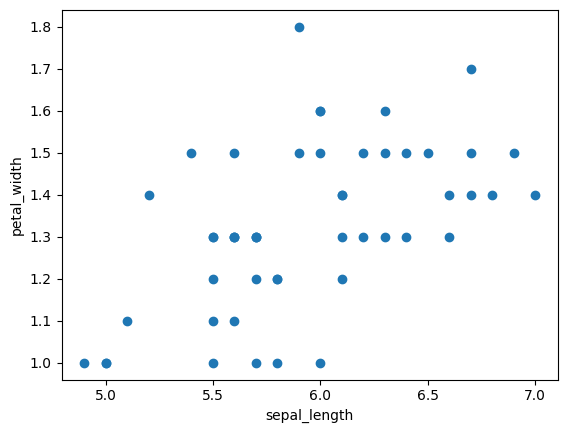

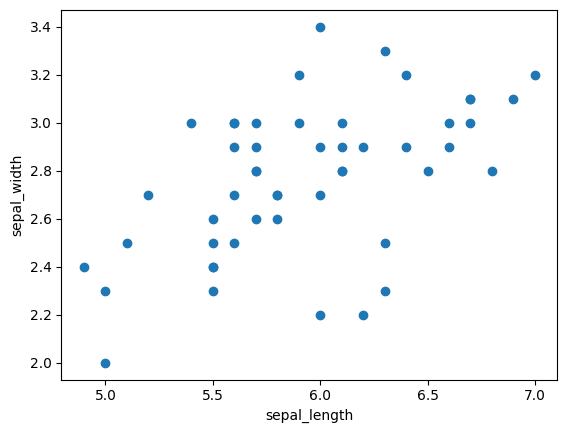

Plots for species virginica:


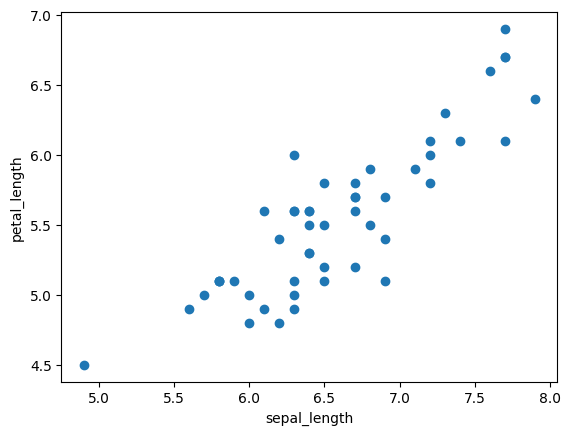

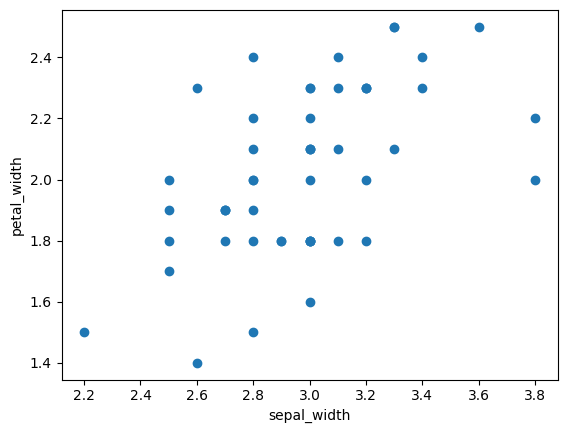

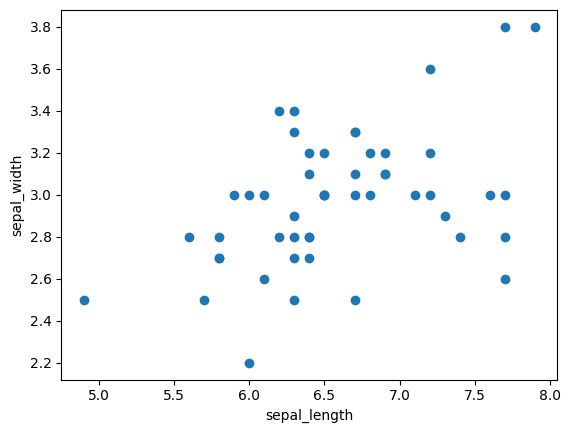

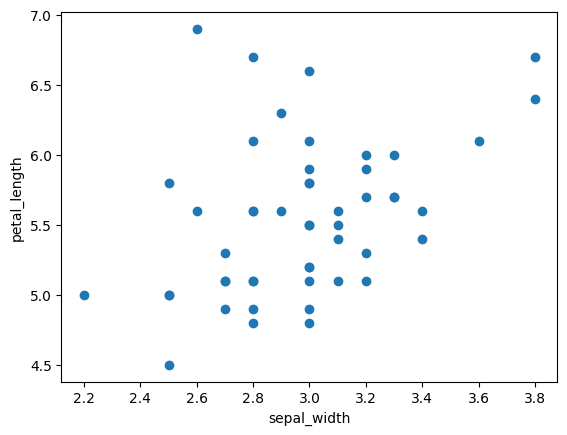

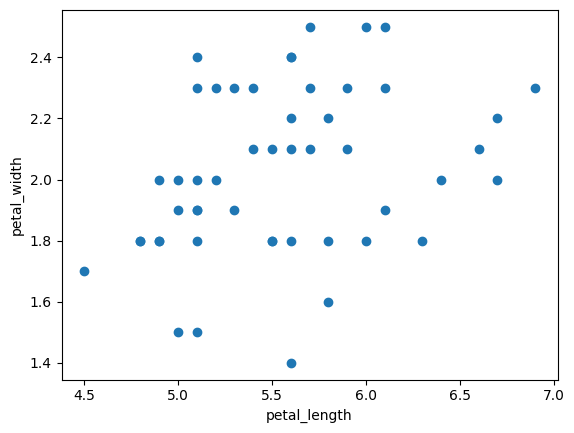

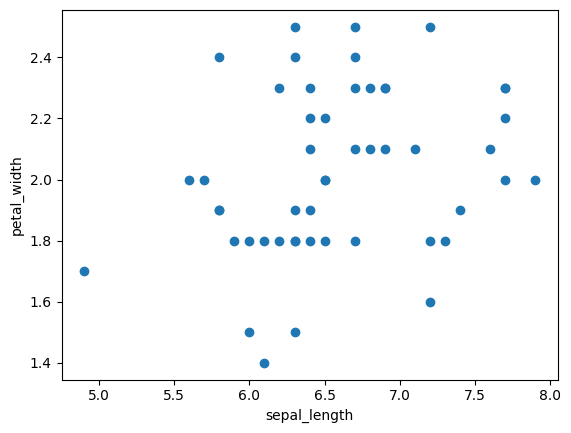

In [ ]:
data1=data[data['species']==species_point_list[0]]
data2=data[data['species']==species_point_list[1]]
data3=data[data['species']==species_point_list[2]]
print('Plots for species setosa:')
plot_columns(data1)
print('Plots for species versicolor:')
plot_columns(data2)
print('Plots for species virginica:')
plot_columns(data3)